### Supplements revenue prediction

In [24]:
# Imports
import kagglehub
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [4]:
# Downloading Covid-19 data from kaggle
path = kagglehub.dataset_download("zahidmughal2343/supplement-sales-data")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\freen\.cache\kagglehub\datasets\zahidmughal2343\supplement-sales-data\versions\1


In [5]:
# Finding path to downloaded data
dataset_path = r"C:\Users\freen\.cache\kagglehub\datasets\zahidmughal2343\supplement-sales-data\versions\1"
files = os.listdir(dataset_path)
print("Pliki:", files)

Pliki: ['Supplement_Sales_Weekly_Expanded.csv']


In [6]:
# Loading kaggle data as a DataFrame
file_path = os.path.join(dataset_path, 'Supplement_Sales_Weekly_Expanded.csv')
supplements_df = pd.read_csv(file_path)
supplements_df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [7]:
# Creating features set and target set

X = supplements_df[['Units Sold', 'Price', 'Units Returned', 'Discount']].values
y = supplements_df['Revenue'].values

print(X.shape, y.shape)

(4384, 4) (4384,)


In [8]:
# Splitting model into training sets and test sets and fitting training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [9]:
# Making predictions

y_pred = reg_all.predict(X_test)

In [10]:
# Computing R-squared

reg_all.score(X_test, y_test)

0.9934154394588758

In [11]:
# Computing RMSE

root_mean_squared_error(y_test, y_pred)

174.649380747127

In [12]:
# Cross-validation

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [13]:
# Printing Cross-validation results

print(cv_results)

[0.99387979 0.99331349 0.99362814 0.99420326 0.9931697  0.99412911]


In [ ]:
# Ridge regression
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ypred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.9934154807012894, 0.9934158111418999, 0.993417132734998, 0.9934178689313907, 0.9934285655065959]


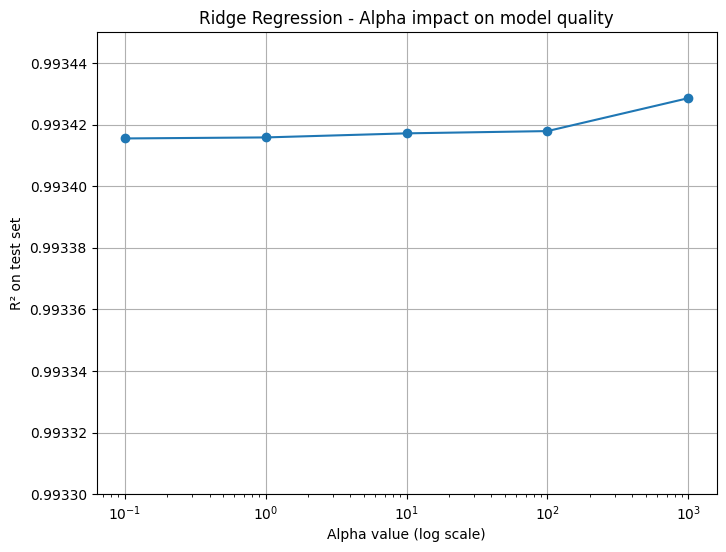

In [21]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
plt.figure(figsize=(8, 6))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha value (log scale)")
plt.ylabel("R² on test set")
plt.ylim(0.9933, 0.99345)
plt.title("Ridge Regression - Alpha impact on model quality")
plt.grid(True)
plt.show()

In [25]:
# Lasso regression
scores = []
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.9934167252535402, 0.9934161692069529, 0.9934229601276194, 0.9934300552379942, 0.9934484945271349]


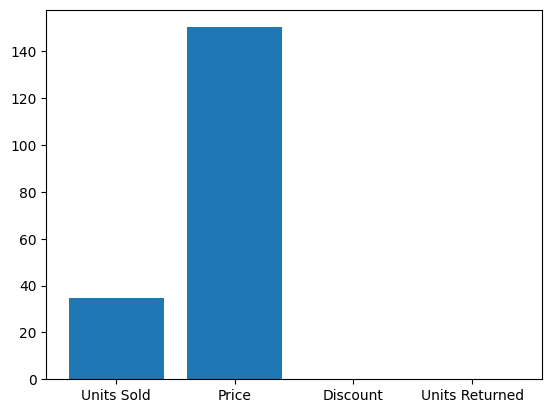

In [31]:
X = supplements_df.drop(["Revenue", "Date", "Product Name", "Category", "Location", "Platform"], axis=1).values
y = supplements_df['Revenue'].values
names = supplements_df.drop(["Revenue", "Date", "Product Name", "Category", "Location", "Platform"], axis=1).columns
lasso = Lasso(alpha=50.0)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.show()